In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the file of contestant data
file_path = '/Users/ginagrainda/Desktop/survivor_data/survivor_contestants_encoded.csv'
contestants_df = pd.read_csv(file_path)

print(contestants_df.head())

     contestant_name  age            hometown                profession  \
0  Sonja Christopher   63    Walnut Creek, CA  Musician/Retired Teacher   
1      B.B. Andersen   64  Mission Hills,  KS     Real Estate Developer   
2    Stacey Stillman   27  San Francisco,  CA                  Attorney   
3        Ramona Gray   29         Edison,  NJ                Biochemist   
4          Dirk Been   23   Spring Green,  WI              Dairy Farmer   

   num_season  old_school_season  new_era_season  finish  winner  black  ...  \
0           1                  1               0    16.0     0.0      0  ...   
1           1                  1               0    15.0     0.0      0  ...   
2           1                  1               0    14.0     0.0      0  ...   
3           1                  1               0    13.0     0.0      1  ...   
4           1                  1               0    12.0     0.0      0  ...   

      region  astrological_sign  tribe_color  age_band  age_band_18-

In [2]:
# Create a separate data frame for winners
winners_df = contestants_df[contestants_df['winner'] == 1]
print(winners_df.head())

   contestant_name  age          hometown                  profession  \
15   Richard Hatch   39      Newport,  RI           Corporate Trainer   
31     Tina Wesson   39    Knoxville,  TN              Personal Nurse   
47      Ethan Zohn   27     New York,  NY  Professional Soccer Player   
63  Vecepia Towery   36      Hayward,  CA              Office Manager   
79    Brian Heidik   34  Quartz Hill,  CA           Used Car Salesman   

    num_season  old_school_season  new_era_season  finish  winner  black  ...  \
15           1                  1               0     1.0     1.0      0  ...   
31           2                  1               0     1.0     1.0      0  ...   
47           3                  1               0     1.0     1.0      0  ...   
63           4                  1               0     1.0     1.0      1  ...   
79           5                  1               0     1.0     1.0      0  ...   

       region  astrological_sign  tribe_color  age_band  age_band_18-25  \

In [3]:
# Create a data frame of contestants who did not win
losers_df = contestants_df[contestants_df['winner'] == 0]
print(losers_df.head())

     contestant_name  age            hometown                profession  \
0  Sonja Christopher   63    Walnut Creek, CA  Musician/Retired Teacher   
1      B.B. Andersen   64  Mission Hills,  KS     Real Estate Developer   
2    Stacey Stillman   27  San Francisco,  CA                  Attorney   
3        Ramona Gray   29         Edison,  NJ                Biochemist   
4          Dirk Been   23   Spring Green,  WI              Dairy Farmer   

   num_season  old_school_season  new_era_season  finish  winner  black  ...  \
0           1                  1               0    16.0     0.0      0  ...   
1           1                  1               0    15.0     0.0      0  ...   
2           1                  1               0    14.0     0.0      0  ...   
3           1                  1               0    13.0     0.0      1  ...   
4           1                  1               0    12.0     0.0      0  ...   

      region  astrological_sign  tribe_color  age_band  age_band_18-

In [4]:
# How many contestants are there? What is the gender breakdown?

# De-dupe the data as some contestants have played more than once
distinct_players = contestants_df.drop_duplicates(subset='contestant_name')


contestant_count = distinct_players.shape[0]
male_contestant_count = distinct_players[distinct_players['gender'] == 'M'].shape[0]
female_contestant_count = distinct_players[distinct_players['gender'] == 'F'].shape[0]
nonbinary_contestant_count = distinct_players[distinct_players['gender'] == 'N'].shape[0]
percent_male = (male_contestant_count / contestant_count) * 100
percent_female = (female_contestant_count / contestant_count) * 100
percent_nonbinary = (nonbinary_contestant_count / contestant_count) * 100

# Print results
print('Contestants: ' + str(contestant_count))
print('Male Contestants: ' + str(male_contestant_count) + ' , ' + '{:.2f}%'.format(percent_male))
print('Female Contestants: ' + str(female_contestant_count) + ' , ' + '{:.2f}%'.format(percent_female))
print('Nonbinary Contestants: ' + str(nonbinary_contestant_count) + ' , ' + '{:.2f}%'.format(percent_nonbinary))

Contestants: 715
Male Contestants: 354 , 49.51%
Female Contestants: 359 , 50.21%
Nonbinary Contestants: 2 , 0.28%


In [9]:
# What is the gender breakdown of winners? 
distinct_winners = winners_df.drop_duplicates(subset='contestant_name')

winner_count = distinct_winners.shape[0]
male_winner_count = distinct_winners[distinct_winners['gender'] == 'M'].shape[0]
female_winner_count = distinct_winners[distinct_winners['gender'] == 'F'].shape[0]
nonbinary_winner_count = distinct_winners[distinct_winners['gender'] == 'N'].shape[0]
percent_male_winner = (male_winner_count / winner_count) * 100
percent_female_winner = (female_winner_count / winner_count) * 100
percent_nonbinary_winner = (nonbinary_winner_count / winner_count) * 100

# Print results
print('Contestants: ' + str(winner_count))
print('Male Contestants: ' + str(male_winner_count) + ' , ' + '{:.2f}%'.format(percent_male_winner))
print('Female Contestants: ' + str(female_winner_count) + ' , ' + '{:.2f}%'.format(percent_female_winner))
print('Nonbinary Contestants: ' + str(nonbinary_winner_count) + ' , ' + '{:.2f}%'.format(percent_nonbinary_winner))

Contestants: 44
Male Contestants: 26 , 59.09%
Female Contestants: 18 , 40.91%
Nonbinary Contestants: 0 , 0.00%


In [5]:
# How older are the contestants? What is the average age? 
avg_age_contestants = contestants_df['age'].mean()
avg_age_winners = winners_df['age'].mean()

# Oldest and youngest contestants
oldest_contestant = contestants_df.loc[contestants_df['age'].idxmax(), ['contestant_name', 'age', 'num_season']]
youngest_contestant = contestants_df.loc[contestants_df['age'].idxmin(), ['contestant_name', 'age', 'num_season']]

# Oldest and youngest winners
oldest_winner = winners_df.loc[winners_df['age'].idxmax(), ['contestant_name', 'age', 'num_season']]
youngest_winner = winners_df.loc[winners_df['age'].idxmin(), ['contestant_name', 'age', 'num_season']]

# Print results
print('Average Age: ' + str(avg_age_contestants))
print('Oldest Contestant: ' + str(oldest_contestant))
print('Youngest Contestant: ' + str(youngest_contestant))

print('Average Age of Winners: ' + str(avg_age_winners))
print('Oldest Winner: ' + str(oldest_winner))
print('Youngest Winner: ' + str(youngest_winner))

Average Age: 33.19603267211202
Oldest Contestant: contestant_name    Rudy Boesch
age                         75
num_season                   8
Name: 113, dtype: object
Youngest Contestant: contestant_name    Will Wahl
age                       18
num_season                33
Name: 587, dtype: object
Average Age of Winners: 31.5
Oldest Winner: contestant_name    Bob Crowley
age                         57
num_season                  17
Name: 294, dtype: object
Youngest Winner: contestant_name    Jenna Morasca
age                           21
num_season                     6
Name: 95, dtype: object


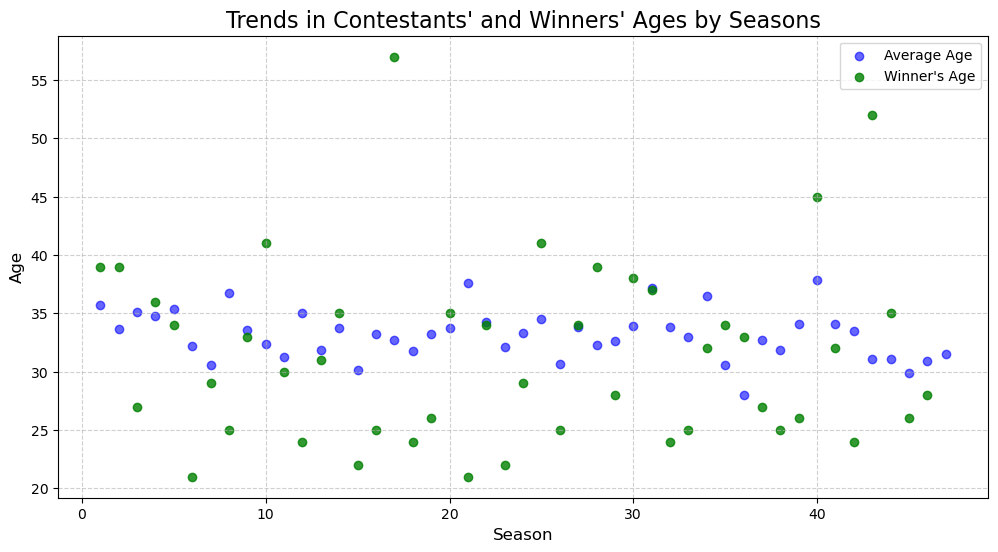

In [6]:
# Scatterplot to evaluate age trends
# The plot below displays the average age by season in blue and the winner's age in red.

# Calculate average age per season
avg_age_per_season = contestants_df.groupby('num_season')['age'].mean()

# Extract winners' ages by season
winners_age_per_season = winners_df.groupby('num_season')['age'].first()

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(avg_age_per_season.index, avg_age_per_season, color = 'blue', alpha = 0.6, label = 'Average Age')
plt.scatter(winners_age_per_season.index, winners_age_per_season, color = 'green', alpha = 0.8, label = 'Winner\'s Age')
plt.title('Trends in Contestants\' and Winners\' Ages by Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

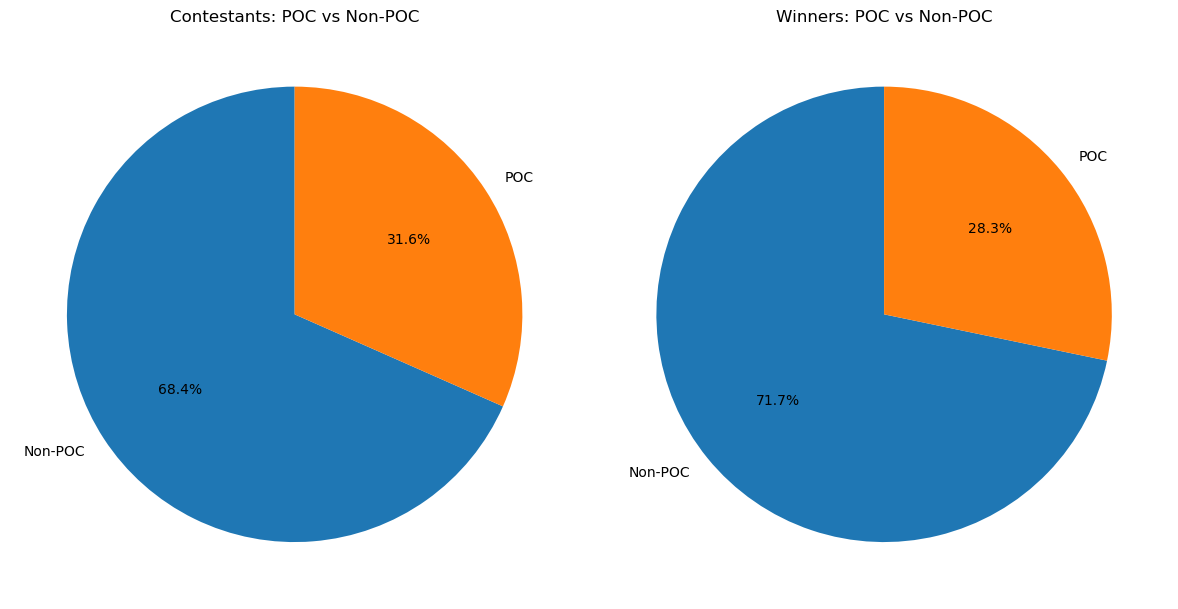

In [7]:
# POC - are there any trends based related to race? 

# Count of POC in the survivor dataset
contestants_race = contestants_df['poc'].value_counts()
winners_race = winners_df['poc'].value_counts()


# Plot the data
plt.figure(figsize=(12, 6)) 

# Contestants Pie Chart
plt.subplot(1, 2, 1)
plt.pie(contestants_race, labels = ['Non-POC', 'POC'], autopct ='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], startangle=90)
plt.title('Contestants: POC vs Non-POC')

# Winner Pie Chart
plt.subplot(1, 2, 2)
plt.pie(winners_race, labels=['Non-POC', 'POC'], autopct='%1.1f%%',
        colors=['#1f77b4', '#ff7f0e'], startangle=90)
plt.title('Winners: POC vs Non-POC')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

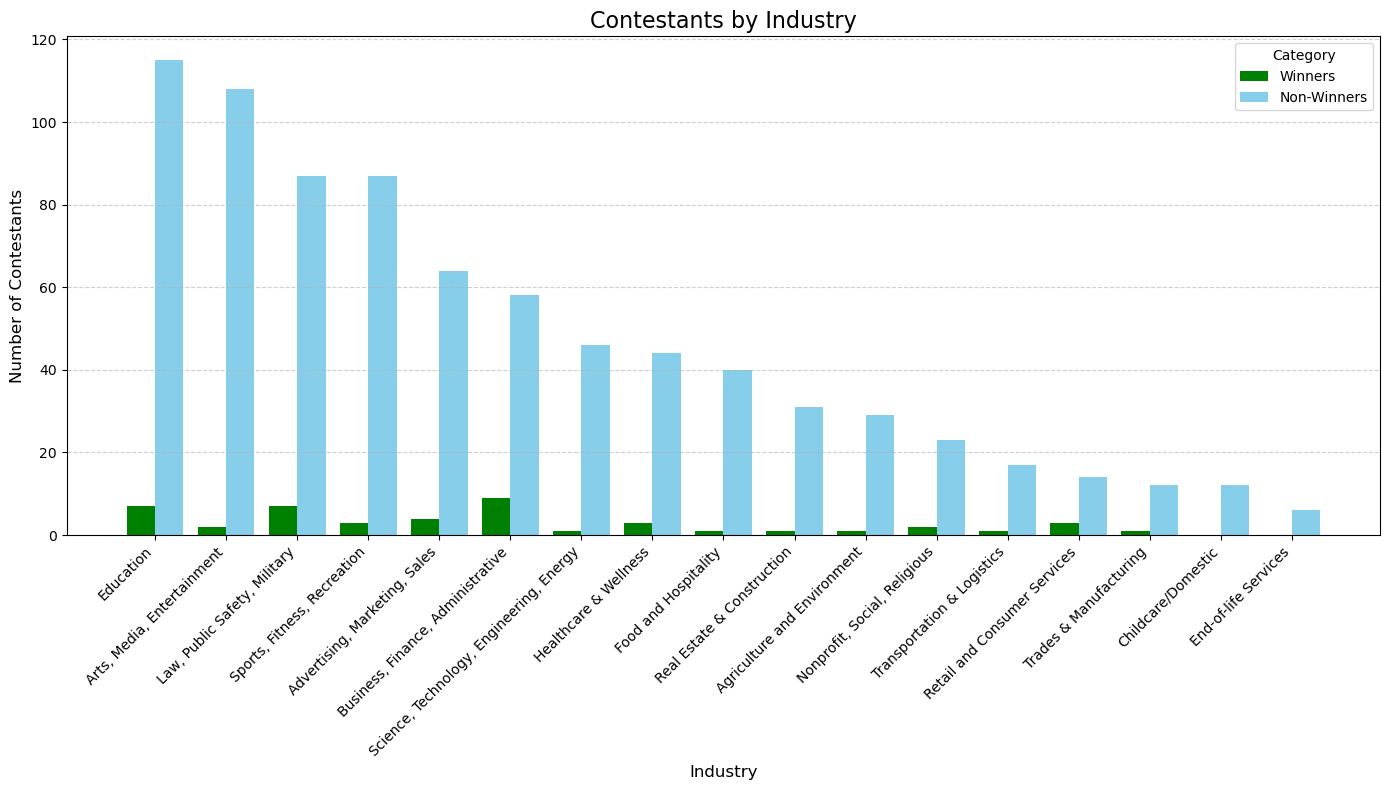

In [8]:
# Occupation - Compare the counts of contestants based on their industry. Do players in certain industries have more or less success on survivor?
industry_winners = winners_df['industry'].value_counts()
industry_losers = losers_df['industry'].value_counts()
industry_comparison = pd.DataFrame({'Winners': industry_winners, 'Non-Winners': industry_losers}).fillna(0)
industry_comparison['Total'] = industry_comparison['Winners'] + industry_comparison['Non-Winners']
industry_comparison = industry_comparison.sort_values(by='Total', ascending=False)

# Plot the data
x = np.arange(len(industry_comparison)) 
width = 0.4 
plt.figure(figsize=(14, 8))
plt.bar(x - width/2, industry_comparison['Winners'], width, label='Winners', color='green')
plt.bar(x + width/2, industry_comparison['Non-Winners'], width, label='Non-Winners', color='skyblue')
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Contestants', fontsize=12)
plt.title('Contestants by Industry', fontsize=16)
plt.xticks(x, industry_comparison.index, rotation=45, ha='right')
plt.legend(title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()